In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset.

In [2]:
FP=pd.read_csv(r"D:\flip WS\Fligh-Price-Prediction\Fdp.csv")

In [3]:
FP.head(10)

,Unnamed: 0,Airline,Flight Number,Date of Departure,From,To,Duration,Total Stops,Price
0,0,Air Asia,I5-764,"Sun, Feb 13",New Delhi,Mumbai,2h 10m,Non Stop,"2,410"
1,1,IndiGo,6E-5001,"Sun, Feb 13",New Delhi,Mumbai,2h 10m,Non Stop,"2,410"
2,2,IndiGo,6E-6202,"Sun, Feb 13",New Delhi,Mumbai,2h 10m,Non Stop,"2,410"
3,3,IndiGo,6E-2046,"Sun, Feb 13",New Delhi,Mumbai,2h 10m,Non Stop,"2,410"
4,4,IndiGo,6E-5041,"Sun, Feb 13",New Delhi,Mumbai,2h 10m,Non Stop,"2,410"
5,5,IndiGo,6E-549,"Sun, Feb 13",New Delhi,Mumbai,2h 15m,Non Stop,"2,410"
6,6,Air Asia,I5-482,"Sun, Feb 13",New Delhi,Mumbai,2h 15m,Non Stop,"2,410"
7,7,IndiGo,6E-6722,"Sun, Feb 13",New Delhi,Mumbai,2h 15m,Non Stop,"2,410"
8,8,IndiGo,6E-6278,"Sun, Feb 13",New Delhi,Mumbai,2h 20m,Non Stop,"2,410"
9,9,IndiGo,6E-5328,"Sun, Feb 13",New Delhi,Mumbai,2h 30m,Non Stop,"2,410"


In [5]:
FP.shape

(1000, 9)

# checking for null values

In [6]:
FP.isnull().sum()

Unnamed: 0           0
Airline              0
Flight Number        0
Date of Departure    0
From                 0
To                   0
Duration             0
Total Stops          0
Price                0
dtype: int64

There are no null values in dataset.

**Checking for blank spaces, random characters in each column**

In [8]:
search =[" ","-",]

for c in FP:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((FP[c] == s).sum())

  in Unnamed: 0 =  0
- in Unnamed: 0 =  0
  in Airline =  0
- in Airline =  0
  in Flight Number =  0
- in Flight Number =  0
  in Date of Departure =  0
- in Date of Departure =  0
  in From =  0
- in From =  0
  in To =  0
- in To =  0
  in Duration =  0
- in Duration =  0
  in Total Stops =  0
- in Total Stops =  0
  in Price =  0
- in Price =  0


There are no blank spaces, random characters in columns of train dataset

Dataframe Description:
    
    Problem Statement:

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -

Time of purchase patterns (making sure last-minute purchases are expensive)
Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)
A Predictive Model is needed to be built using collected data to predict fares of flights.

Size of Data set: 1000 records

FEATURES:
Airline: The name of the airline.

Flight Number: Number of Flight

Date of Departure: The date of the journey

From: The source from which the service begins.

To: The destination where the service ends.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.



**Target / Label Column:**

Price: The price of the ticket

**Getting the basic summary and statistical information of the data.**

In [9]:
FP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1000 non-null   int64 
 1   Airline            1000 non-null   object
 2   Flight Number      1000 non-null   object
 3   Date of Departure  1000 non-null   object
 4   From               1000 non-null   object
 5   To                 1000 non-null   object
 6   Duration           1000 non-null   object
 7   Total Stops        1000 non-null   object
 8   Price              1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


In [10]:
FP.nunique() #the number of unique values in each column

Unnamed: 0           1000
Airline                 6
Flight Number         683
Date of Departure      43
From                   19
To                     22
Duration              176
Total Stops             4
Price                 207
dtype: int64

# Data Cleaning

In [11]:
FP['Total Stops'].value_counts()

1 Stop       510
Non Stop     471
2 Stop(s)     18
3 Stop(s)      1
Name: Total Stops, dtype: int64

its not requred for Total stops

In [12]:
FP['Airline'].value_counts()

IndiGo       563
Go First     136
Air India     94
Air Asia      85
Vistara       64
SpiceJet      58
Name: Airline, dtype: int64

Its not requred for Airline

In [13]:
FP['From'].value_counts()

New Delhi     222
Kolkata       140
Mumbai        130
Bangalore     130
Hyderabad     128
Goa            40
Guwahati       30
Patna          30
Pune           20
Jaipur         20
Port Blair     20
Chennai        20
Coimbatore     10
Varanasi       10
Vijayawada     10
Chandigarh     10
Kochi          10
Dehradun       10
Lucknow        10
Name: From, dtype: int64

Its not requred for From

In [14]:
FP['To'].value_counts()

New Delhi     240
Mumbai        150
Bangalore     150
Goa            60
Kolkata        50
Hyderabad      42
Chennai        40
Guwahati       40
Pune           30
Patna          30
Port Blair     30
Lucknow        20
Dehradun       20
Jaipur         20
Coimbatore     10
Chandigarh     10
Varanasi       10
Vijayawada     10
Bagdogra       10
Kochi          10
Ahmedabad      10
Tirupati        8
Name: To, dtype: int64

its not required for to

In [15]:
FP['Date of Departure'].value_counts()

Sun, Feb 6     150
Sat, Feb 5      60
Sun, Feb 13     50
Wed, Feb 23     50
Wed, Mar 2      50
Sun, Mar 20     40
Sun, Feb 27     40
Sun, Mar 6      30
Sun, Apr 10     30
Tue, Feb 8      30
Tue, Mar 8      20
Wed, Apr 13     20
Fri, Feb 25     20
Sat, Feb 19     20
Sat, Apr 9      20
Thu, Apr 14     20
Fri, Mar 25     20
Tue, Apr 12     20
Mon, Mar 21     20
Thu, Mar 10     20
Thu, Mar 17     20
Fri, Apr 1      20
Thu, Feb 17     20
Tue, Mar 1      20
Mon, Apr 11     10
Sat, Feb 26     10
Tue, Feb 22     10
Mon, Feb 14     10
Sat, Mar 26     10
Mon, Feb 21     10
Wed, Feb 9      10
Mon, Jan 31     10
Fri, Feb 11     10
Wed, Mar 16     10
Tue, Feb 15     10
Wed, Feb 16     10
Sat, Mar 19     10
Thu, Mar 31     10
Sun, Apr 3      10
Sat, Mar 12     10
Fri, Feb 4      10
Sat, Feb 12     10
Wed, Mar 9      10
Name: Date of Departure, dtype: int64

Its not requred for date of departure

**Converting values in Column 'Price' to int64 datatype**

Converting Pandas column into a list, removing the ',' from the values, reattaching to Original Pandas Dataframe and then converting to int64 datatype

In [16]:
price = FP['Price'].tolist() 

In [17]:
Price = []
for p in price:
    Price.append(p.replace(",",""))

In [18]:
df = pd.DataFrame({'Price':Price})

In [19]:
df.index = FP.index

In [20]:
FP['Price'] = df['Price']

In [21]:
FP['Price'] = FP['Price'].astype('int64')

Dropping column Unnamed: 0 since it is not required for building the predictive model

In [22]:
FP.drop(columns=['Unnamed: 0'],inplace = True)

In [23]:
FP.reset_index(drop=True,inplace = True)

# Feature Engineering

Creating New columns "Day", "Date","Month" from Column 'Date of Departure'

In [24]:
DateDept = FP['Date of Departure'].tolist() 

In [25]:
Day=[]
date = []
Month = []
Date = []

In [26]:
for d in DateDept:
    Day.append(d.split(",")[0])
    date.append(d.split(",")[1])

In [27]:
for d in date:
    Date.append(d.split(" ")[2])
    Month.append(d.split(" ")[1])

In [28]:
df2 = pd.DataFrame({'Day':Day, 'Date':Date,'Month': Month})

In [30]:
df2.index = FP.index

In [31]:
FP[['Day','Date','Month']] = df2[['Day','Date','Month']]

In [32]:
FP['Duration'].unique()

array(['2h 10m', '2h 15m', '2h 20m', '2h 30m', '7h 10m', '5h 50m',
       '6h 25m', '7h 45m', '7h 55m', '9h 00m', '8h 25m', '9h 05m',
       '2h 55m', '2h 45m', '5h 35m', '5h 55m', '7h 15m', '7h 20m',
       '8h 30m', '9h 35m', '10h 50m', '11h 00m', '6h 35m', '5h 15m',
       '6h 15m', '6h 30m', '9h 10m', '2h 05m', '7h 00m', '7h 35m',
       '8h 45m', '4h 55m', '6h 00m', '15h 10m', '15h 35m', '5h 00m',
       '11h 35m', '16h 00m', '22h 25m', '26h 10m', '15h 05m', '5h 05m',
       '18h 05m', '1h 30m', '1h 35m', '1h 40m', '1h 45m', '4h 40m',
       '9h 25m', '2h 00m', '2h 35m', '8h 35m', '11h 05m', '2h 25m',
       '6h 45m', '8h 20m', '9h 45m', '9h 50m', '11h 30m', '5h 40m',
       '8h 00m', '8h 40m', '6h 20m', '6h 55m', '12h 05m', '4h 05m',
       '5h 20m', '5h 25m', '7h 25m', '8h 05m', '8h 55m', '1h 20m',
       '1h 10m', '1h 15m', '1h 25m', '1h 00m', '2h 40m', '2h 50m',
       '4h 15m', '7h 05m', '11h 20m', '7h 40m', '9h 30m', '10h 15m',
       '10h 40m', '10h 55m', '1h 50m', '3h 05m'

It is observed that Duration values are the difference between Dep_Time and Arrival_Time

Converting the values in Duration column to minutes

In [33]:
FP['Duration']

0       2h 10m
1       2h 10m
2       2h 10m
3       2h 10m
4       2h 10m
        ...   
995    18h 40m
996    15h 30m
997    21h 50m
998     2h 05m
999     2h 10m
Name: Duration, Length: 1000, dtype: object

The values are represented in hours('h') and minutes('m'). For understanding the relationship between price(which contains integer values) and Duration, the values of Duration column must be converted into minutes of integer value type.

The 'h' component of each value will be multiplied by 60, and then added to 'm' component.

Firstly, 'h' is replaced by string '*60', the empty space in between is replaced by string '+' and 'm' character at the end is removed.

Since each value is string type, eval function can be used.

Finally eval() function will be applied to all the values which will treat each value as a mathematical operation statement.

ie. (x*60+y) where x is the number attached to 'h' and y is the number attached to 'm'

In [34]:
duration = FP['Duration'].tolist() #creating a list with values from colum 'Duration'

In [35]:
duration

['2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 15m',
 '2h 15m',
 '2h 15m',
 '2h 20m',
 '2h 30m',
 '7h 10m',
 '5h 50m',
 '6h 25m',
 '7h 45m',
 '7h 55m',
 '9h 00m',
 '6h 25m',
 '7h 55m',
 '8h 25m',
 '9h 05m',
 '2h 55m',
 '2h 45m',
 '5h 35m',
 '5h 55m',
 '7h 15m',
 '7h 20m',
 '8h 30m',
 '9h 05m',
 '9h 35m',
 '10h 50m',
 '11h 00m',
 '6h 35m',
 '5h 15m',
 '6h 15m',
 '6h 30m',
 '9h 10m',
 '10h 50m',
 '2h 45m',
 '2h 45m',
 '2h 45m',
 '2h 05m',
 '2h 10m',
 '2h 10m',
 '2h 15m',
 '2h 20m',
 '5h 35m',
 '7h 00m',
 '7h 35m',
 '8h 45m',
 '9h 05m',
 '4h 55m',
 '9h 35m',
 '2h 05m',
 '2h 05m',
 '2h 05m',
 '2h 05m',
 '2h 10m',
 '2h 15m',
 '6h 00m',
 '8h 45m',
 '15h 10m',
 '15h 35m',
 '5h 00m',
 '11h 35m',
 '16h 00m',
 '22h 25m',
 '26h 10m',
 '15h 05m',
 '5h 05m',
 '18h 05m',
 '1h 30m',
 '1h 30m',
 '1h 35m',
 '1h 35m',
 '1h 40m',
 '1h 40m',
 '1h 45m',
 '1h 45m',
 '4h 40m',
 '9h 25m',
 '2h 20m',
 '2h 00m',
 '2h 05m',
 '2h 05m',
 '2h 05m',
 '2h 05m',
 '2h 15m',
 '2h 35m',
 '8h 35m',
 '11h 05m'

In [36]:
#""" replacing 'h' with *60, whitespace with "+",removing "m" and #
#removing leading zeroes from the decimal integer literals since they aren't allowed in python """#

for i in range(0,len(duration)):
    duration[i] = duration[i].replace("h","*60").replace("00","0").replace("01","1").replace("02","2").replace("03","3").replace("04","4").replace("05","5").replace("06","6").replace("07","7").replace("08","8").replace("09","9").replace(" ","+").replace("m","").replace("1.0*60+","1*60") 

    
duration

['2*60+10',
 '2*60+10',
 '2*60+10',
 '2*60+10',
 '2*60+10',
 '2*60+15',
 '2*60+15',
 '2*60+15',
 '2*60+20',
 '2*60+30',
 '7*60+10',
 '5*60+50',
 '6*60+25',
 '7*60+45',
 '7*60+55',
 '9*60+0',
 '6*60+25',
 '7*60+55',
 '8*60+25',
 '9*60+5',
 '2*60+55',
 '2*60+45',
 '5*60+35',
 '5*60+55',
 '7*60+15',
 '7*60+20',
 '8*60+30',
 '9*60+5',
 '9*60+35',
 '10*60+50',
 '11*60+0',
 '6*60+35',
 '5*60+15',
 '6*60+15',
 '6*60+30',
 '9*60+10',
 '10*60+50',
 '2*60+45',
 '2*60+45',
 '2*60+45',
 '2*60+5',
 '2*60+10',
 '2*60+10',
 '2*60+15',
 '2*60+20',
 '5*60+35',
 '7*60+0',
 '7*60+35',
 '8*60+45',
 '9*60+5',
 '4*60+55',
 '9*60+35',
 '2*60+5',
 '2*60+5',
 '2*60+5',
 '2*60+5',
 '2*60+10',
 '2*60+15',
 '6*60+0',
 '8*60+45',
 '15*60+10',
 '15*60+35',
 '5*60+0',
 '11*60+35',
 '16*60+0',
 '22*60+25',
 '26*60+10',
 '15*60+5',
 '5*60+5',
 '18*60+5',
 '1*60+30',
 '1*60+30',
 '1*60+35',
 '1*60+35',
 '1*60+40',
 '1*60+40',
 '1*60+45',
 '1*60+45',
 '4*60+40',
 '9*60+25',
 '2*60+20',
 '2*60+0',
 '2*60+5',
 '2*60+5',
 

In [37]:
for i in range(0,len(duration)):
    duration[i] = eval(duration[i])

In [38]:
len(duration)

1000

Adding Duration(mins) column to FP dataframe.

In [39]:
dur_df = pd.DataFrame({"Duration(mins)":duration})

In [41]:
dur_df.index = FP.index

In [42]:
FP['Duration(mins)'] = dur_df['Duration(mins)']

In [43]:
FP

,Airline,Flight Number,Date of Departure,From,To,Duration,Total Stops,Price,Day,Date,Month,Duration(mins)
0,Air Asia,I5-764,"Sun, Feb 13",New Delhi,Mumbai,2h 10m,Non Stop,2410,Sun,13,Feb,130
1,IndiGo,6E-5001,"Sun, Feb 13",New Delhi,Mumbai,2h 10m,Non Stop,2410,Sun,13,Feb,130
2,IndiGo,6E-6202,"Sun, Feb 13",New Delhi,Mumbai,2h 10m,Non Stop,2410,Sun,13,Feb,130
3,IndiGo,6E-2046,"Sun, Feb 13",New Delhi,Mumbai,2h 10m,Non Stop,2410,Sun,13,Feb,130
4,IndiGo,6E-5041,"Sun, Feb 13",New Delhi,Mumbai,2h 10m,Non Stop,2410,Sun,13,Feb,130
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Air India,9I-9892/508,"Mon, Jan 31",Vijayawada,Bangalore,18h 40m,1 Stop,7314,Mon,31,Jan,1120
996,Air India,9I-9892/698/639,"Mon, Jan 31",Vijayawada,Bangalore,15h 30m,2 Stop(s),12039,Mon,31,Jan,930
997,Air India,AI-468/665/607,"Mon, Jan 31",Vijayawada,Bangalore,21h 50m,2 Stop(s),12315,Mon,31,Jan,1310
998,Air India,AI-544,"Mon, Jan 31",New Delhi,Hyderabad,2h 05m,Non Stop,2098,Mon,31,Jan,125


Dropping the original duration column

In [44]:
FP.drop(columns = ['Duration'],inplace=True)

In [45]:
FP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            1000 non-null   object
 1   Flight Number      1000 non-null   object
 2   Date of Departure  1000 non-null   object
 3   From               1000 non-null   object
 4   To                 1000 non-null   object
 5   Total Stops        1000 non-null   object
 6   Price              1000 non-null   int64 
 7   Day                1000 non-null   object
 8   Date               1000 non-null   object
 9   Month              1000 non-null   object
 10  Duration(mins)     1000 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 86.1+ KB


In [46]:
#converting values in'Day' to int64 datatype
FP['Date'] = FP['Date'].astype('int64')

Getting the basic Statistical information about int64 datatype columns

In [47]:
FP.describe()

,Price,Date,Duration(mins)
count,1000.000000,1000.000000,1000.000000
mean,3280.675000,12.620000,361.050000
std,1734.630978,7.986199,302.668062
min,926.000000,1.000000,55.000000
25%,2276.000000,6.000000,130.000000
50%,2900.000000,11.000000,297.500000
75%,3545.500000,19.250000,535.000000
max,15677.000000,31.000000,2225.000000


A higher max value that 75% in the columns indicates the presence of outliers

# Interpreting Relationship between Independent and Dependent Variables

**Analyzing the Target Column**

<AxesSubplot:xlabel='Price', ylabel='Density'>

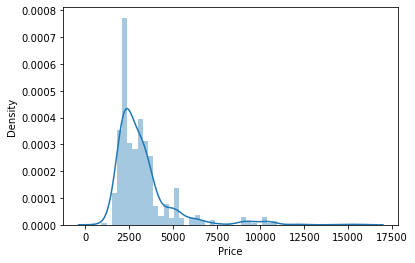

In [48]:
sns.distplot(FP.Price)

Distribution is skewed and tails of from 5000 mark.

In [49]:
FP.Price.skew()

3.026013842717389

From the graph above it is observed that the Price data forms a continuous distribution with mean of 3280.675 and tails off from 5000 mark.

**Analyzing the Feature Columns**

In [50]:
FP.dtypes[FP.dtypes == 'object'] #Identifying the Categorical Columns

Airline              object
Flight Number        object
Date of Departure    object
From                 object
To                   object
Total Stops          object
Day                  object
Month                object
dtype: object

In [51]:
FP['Airline'].value_counts()

IndiGo       563
Go First     136
Air India     94
Air Asia      85
Vistara       64
SpiceJet      58
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

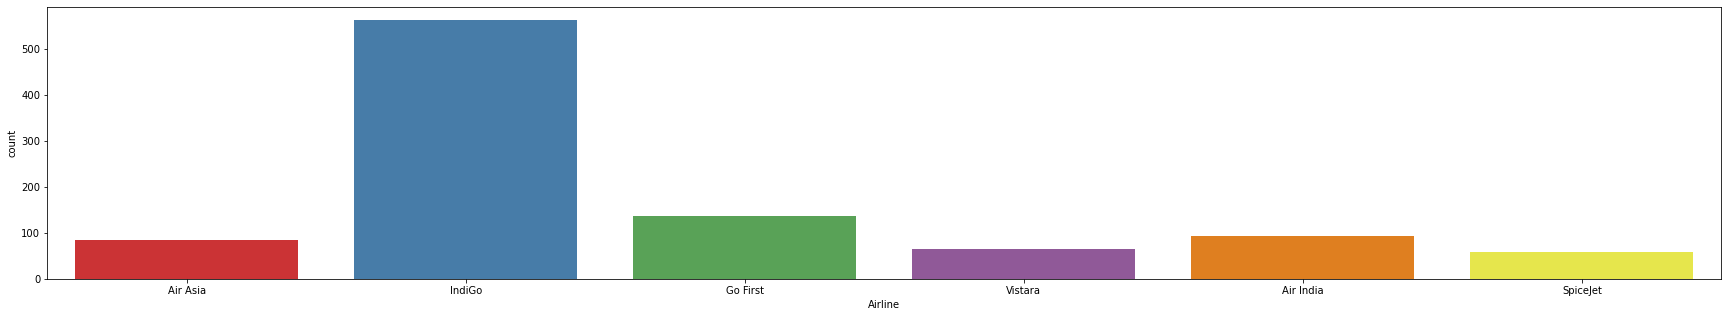

In [52]:
plt.figure(figsize=(30,5),facecolor='white')
sns.countplot(FP['Airline'], palette="Set1")

IndiGo has the highest number of flights followed by Air India and Go First

<AxesSubplot:xlabel='count', ylabel='From'>

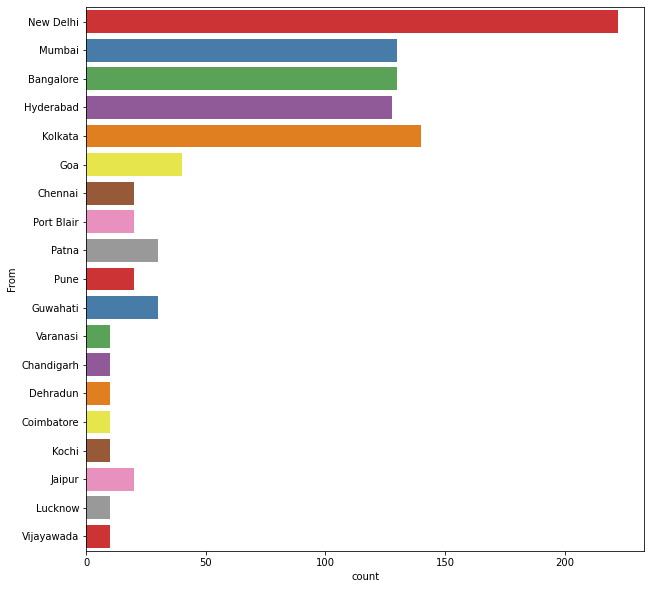

In [53]:
plt.figure(figsize=(10,10),facecolor='white')
sns.countplot(y=FP['From'], palette="Set1")

Highest number of flights are from Delhi followed by Mumbai, Kolkata,Bangalore and Hyderabad

<AxesSubplot:xlabel='count', ylabel='To'>

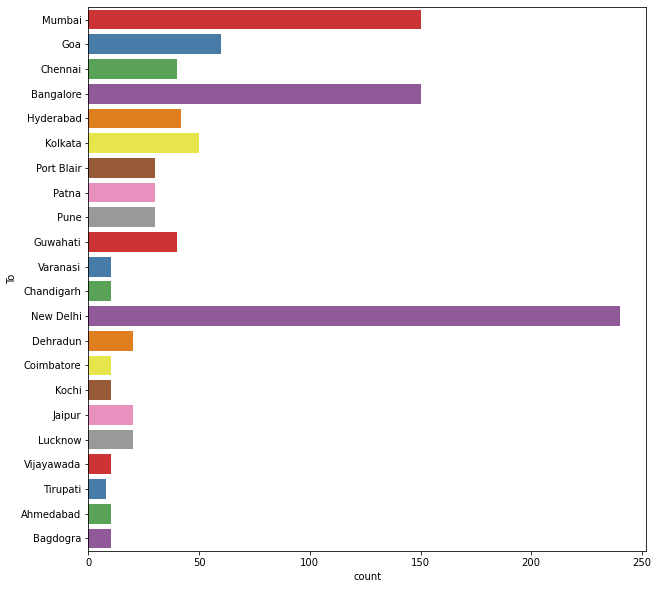

In [54]:
plt.figure(figsize=(10,10),facecolor='white')
sns.countplot(y=FP['To'], palette="Set1")

New Delhi is the most popular destination followed by Bangalore, Goa, Kolkata and Mumbai

<AxesSubplot:xlabel='Total Stops', ylabel='count'>

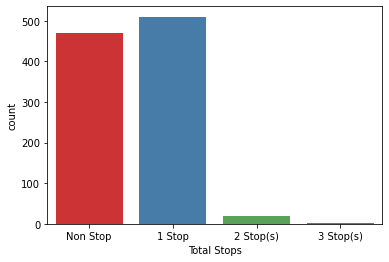

In [55]:
sns.countplot(FP['Total Stops'], palette="Set1")

Highest number of flights have only 1 stop between source and destination while 2nd highest number of flights are non stop

# Interpreting Relationship between Independent and Dependent Variables

**Analyzing Relationship between Day, Month columns and Price**

Text(0.5, 1.0, 'Price Trend')

<Figure size 1440x3024 with 0 Axes>

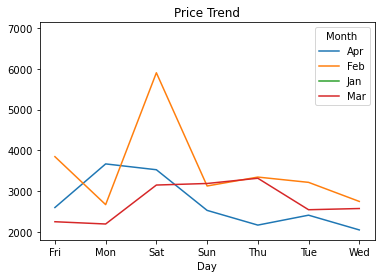

In [56]:
plt.figure(figsize=(20,42))
FP.groupby(['Day','Month']).mean()['Price'].unstack().plot()
plt.title('Price Trend')

<AxesSubplot:xlabel='Day', ylabel='Price'>

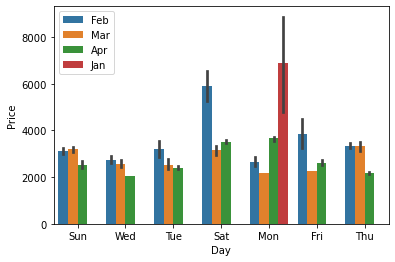

In [58]:
sns.barplot(FP['Day'],FP['Price'],hue=Month)

From above graphs it can be observed that on an average, there is a steady decline in Flight price from January to April, with the prices being lowest in January.

From above graphs it can be observed that Flight Prices increase on an average, as the day of departure gets nearer.

Flight Ticket prices are the highest on Tuesdays,Friday,Mondays and during the Weekend on an average.

**Analyzing Relationship between Airlines and Price**

Text(0.5, 1.0, 'Price Trend')

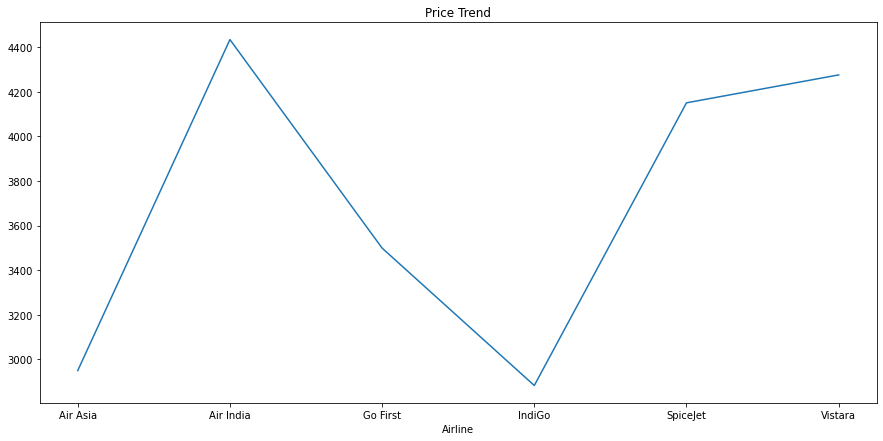

In [59]:
fig, ax = plt.subplots(figsize=(15,7))
FP.groupby(['Airline']).mean()['Price'].plot(ax=ax)
plt.title('Price Trend')

Text(0.5, 1.0, 'Price Trend')

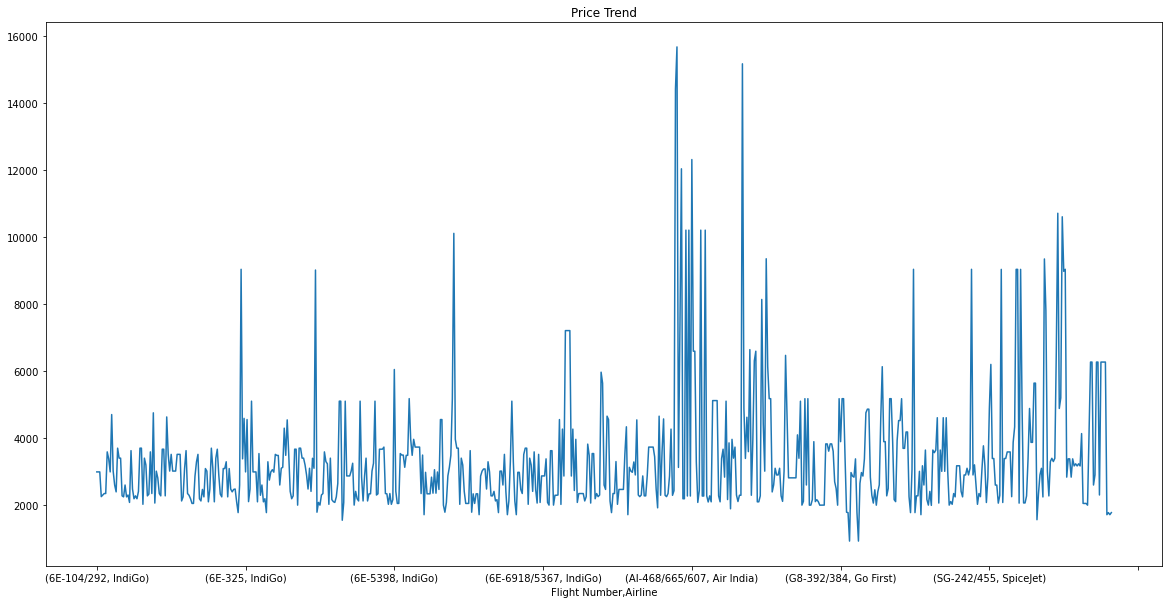

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
FP.groupby(['Flight Number','Airline'])['Price'].mean().plot(ax=ax)
plt.title('Price Trend')


IndiGo,SpiceJet offer air tickets at the most affordable prices on average, whereas Air India is the most expensive on average.

Text(0.5, 1.0, 'Price Trend')

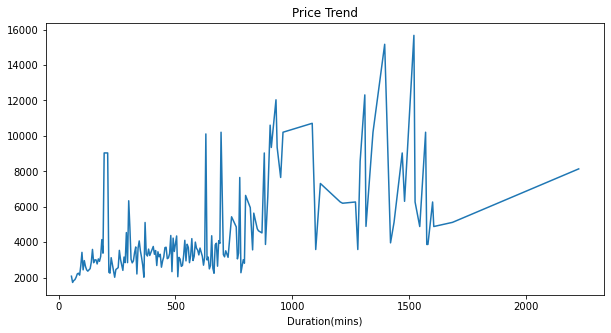

In [62]:
plt.figure(figsize=(10,5))
FP.groupby('Duration(mins)')['Price'].mean().plot()
plt.title('Price Trend')

Text(0.5, 1.0, 'Duration vs Stops')

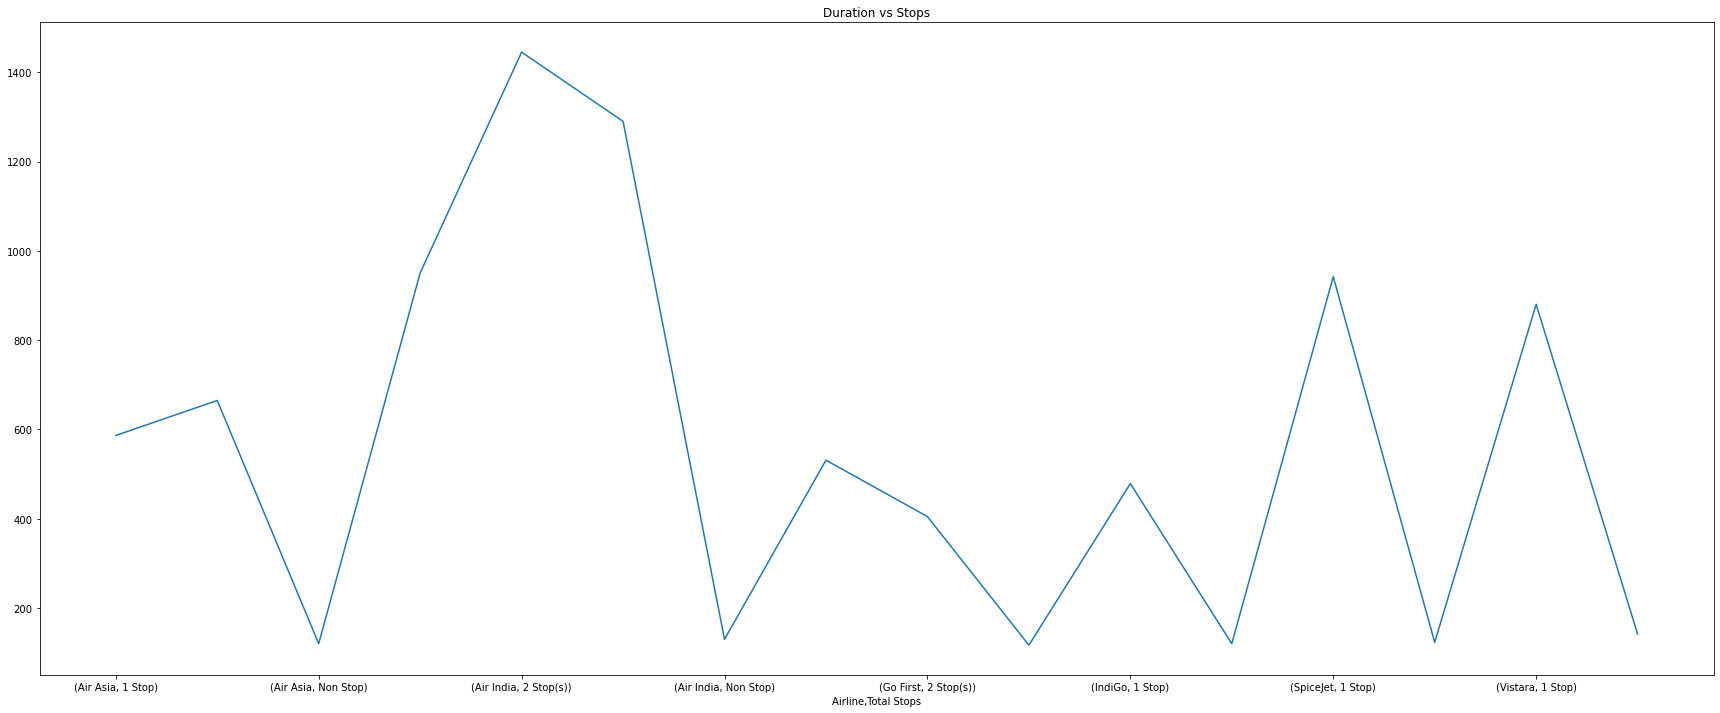

In [63]:
plt.figure(figsize=(30,12))
FP.groupby(['Airline','Total Stops'])['Duration(mins)'].mean().plot()
plt.title('Duration vs Stops')

It can be observed that Number of Stops impact the travel time of Airlines

Text(0.5, 1.0, 'Price vs Stops')

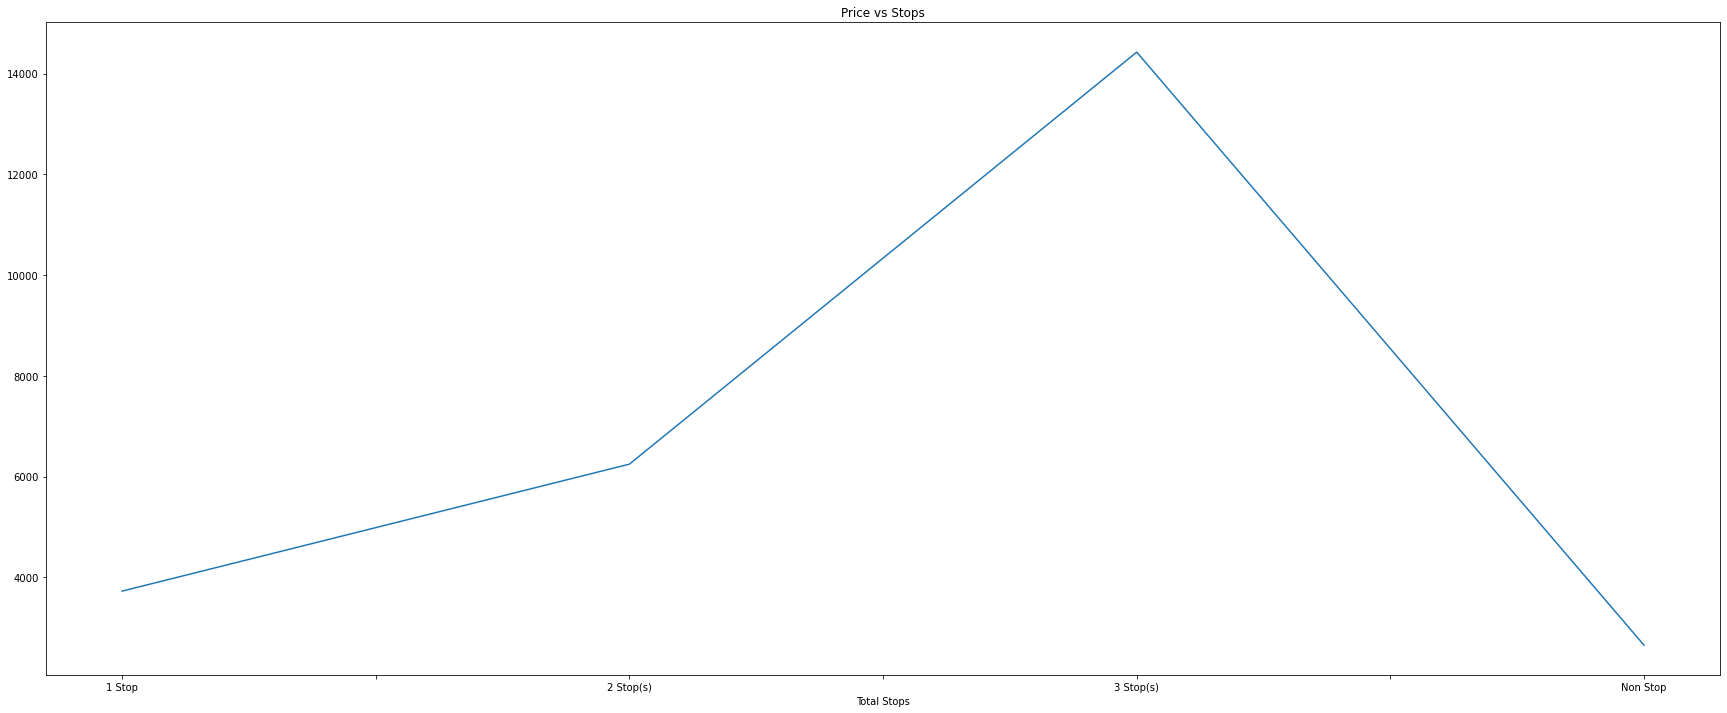

In [64]:
plt.figure(figsize=(30,12))
FP.groupby(['Total Stops'])['Price'].mean().plot()
plt.title('Price vs Stops')

It can be observed that Number of Stops impact the Air Ticket Pricing of Airlines

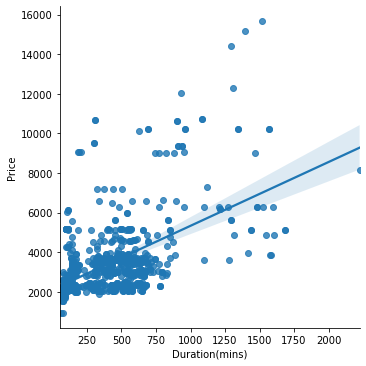

In [65]:
sns.lmplot(x="Duration(mins)", y="Price", data=FP)

There is a linear relationship between Price and flight duration.

<AxesSubplot:xlabel='To', ylabel='Price'>

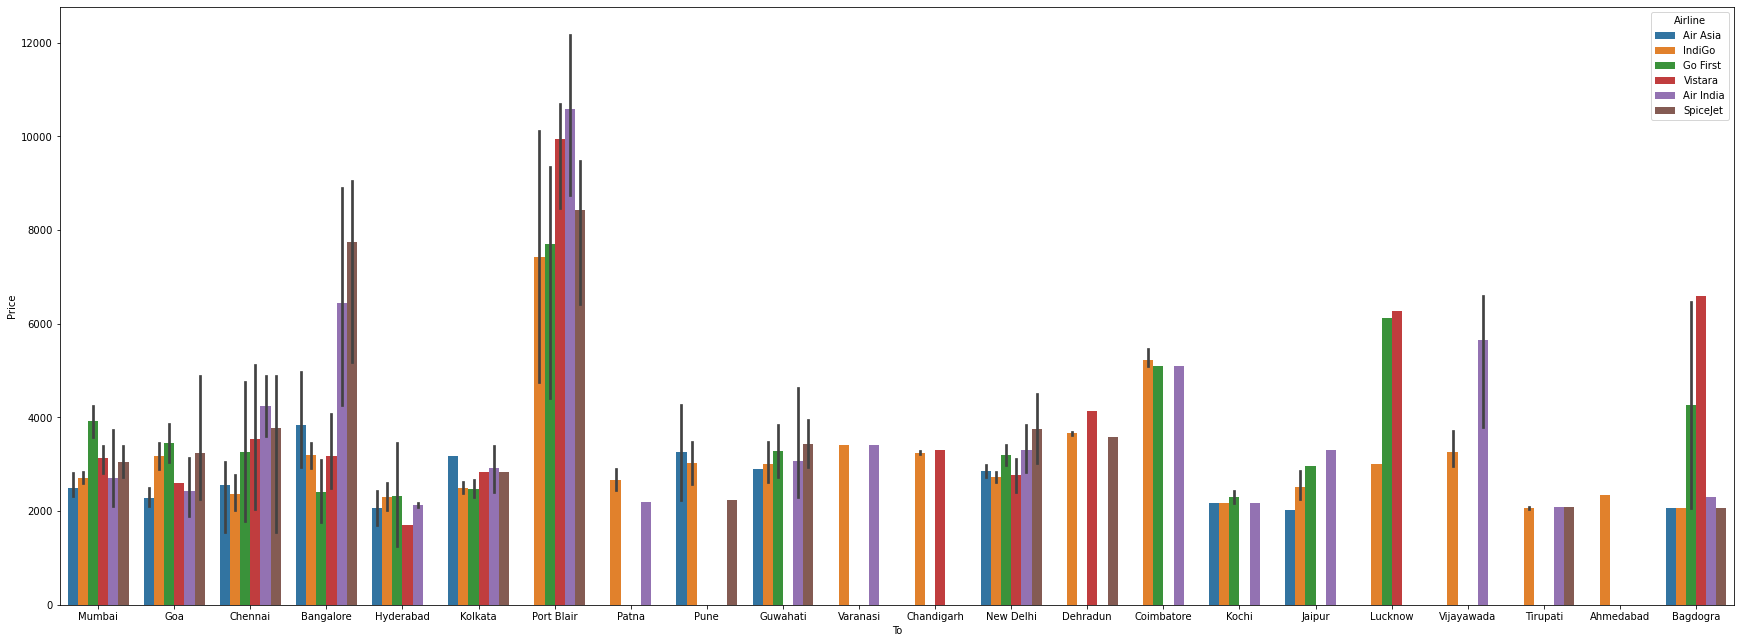

In [67]:
plt.figure(figsize=(30,11),facecolor='white')
sns.barplot(FP['To'],FP['Price'],hue=FP['Airline'])

Goa,Mumbai,Pune,Bangalore,Kolakata,Port Blair,New Delhi are the most expensive destinations while,Kochi, Coimbatore,Jammu,Chennai,Hyderabad,Indore,Tirupati are the most affordable destinations

Indigo,Air Asia and Spicejet provide most affordable Airtickets to the destinations

# Checking for Outliers in continuous data type Features.

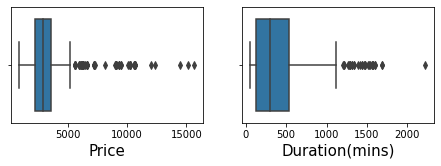

In [68]:
plt.figure(figsize=(20,20),facecolor='white')
plotnum=1
for col in FP[['Price','Duration(mins)']]:
    if plotnum<=34:
        plt.subplot(8,5,plotnum)
        sns.boxplot(FP[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

There are outliers in all of the above columns

**Removing Outliers using Z score Method**

In [69]:
df2 =FP[['Duration(mins)']].copy() #making a copy of the continuous data type column.

In [70]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [71]:
df3.shape

(972, 1)

In [72]:
df2.shape

(1000, 1)

# Data loss %:

In [73]:
loss=(1000-972)/1000 * 100
loss

2.8000000000000003

2.80% Data loss is within acceptable range

# Using Z score method to reduce outliers since it has a low data loss %

In [74]:
dropindx = FP.index.difference(df3.index)

In [75]:
dropindx

Int64Index([ 65,  66, 165, 166, 341, 342, 437, 438, 439, 471, 505, 506, 507,
            562, 563, 564, 660, 661, 664, 667, 760, 761, 764, 767, 938, 943,
            967, 997],
           dtype='int64')

In [76]:
FP.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [77]:
FP.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

In [78]:
FP

,Airline,Flight Number,Date of Departure,From,To,Total Stops,Price,Day,Date,Month,Duration(mins)
0,Air Asia,I5-764,"Sun, Feb 13",New Delhi,Mumbai,Non Stop,2410,Sun,13,Feb,130
1,IndiGo,6E-5001,"Sun, Feb 13",New Delhi,Mumbai,Non Stop,2410,Sun,13,Feb,130
2,IndiGo,6E-6202,"Sun, Feb 13",New Delhi,Mumbai,Non Stop,2410,Sun,13,Feb,130
3,IndiGo,6E-2046,"Sun, Feb 13",New Delhi,Mumbai,Non Stop,2410,Sun,13,Feb,130
4,IndiGo,6E-5041,"Sun, Feb 13",New Delhi,Mumbai,Non Stop,2410,Sun,13,Feb,130
...,...,...,...,...,...,...,...,...,...,...,...
967,IndiGo,6E-7206/285,"Mon, Jan 31",Vijayawada,Bangalore,1 Stop,7209,Mon,31,Jan,505
968,Air India,9I-9892/508,"Mon, Jan 31",Vijayawada,Bangalore,1 Stop,7314,Mon,31,Jan,1120
969,Air India,9I-9892/698/639,"Mon, Jan 31",Vijayawada,Bangalore,2 Stop(s),12039,Mon,31,Jan,930
970,Air India,AI-544,"Mon, Jan 31",New Delhi,Hyderabad,Non Stop,2098,Mon,31,Jan,125


<AxesSubplot:xlabel='Duration(mins)'>

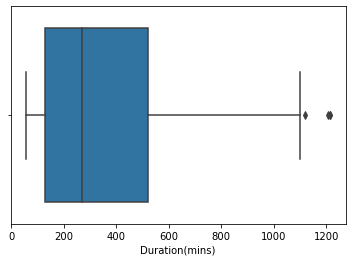

In [79]:
sns.boxplot(FP['Duration(mins)'])

A lot of outliers have been removed.

# Checking for skewness in data distributions

In [80]:
FP['Duration(mins)'].skew()

0.8230682332214787

# Normalizing Data Distribution using PowerTransformer

In [81]:
from sklearn.preprocessing import PowerTransformer

In [82]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [83]:
df4 = FP[['Duration(mins)']]

In [84]:
transformed= powtrans.fit_transform(df4)

In [85]:
type(transformed)

numpy.ndarray

In [86]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [87]:
transformed.skew()

Duration(mins)   -0.002502
dtype: float64

In [89]:
transformed.index = FP.index

In [90]:
FP[['Duration(mins)']] = transformed[['Duration(mins)']]

In [91]:
FP['Duration(mins)'].skew()

-0.002502391845917394

A lot of skewness has been removed.

# Encoding Categorical Columns

**Encoding using get_dummies()**

In [92]:
FP

,Airline,Flight Number,Date of Departure,From,To,Total Stops,Price,Day,Date,Month,Duration(mins)
0,Air Asia,I5-764,"Sun, Feb 13",New Delhi,Mumbai,Non Stop,2410,Sun,13,Feb,-0.828675
1,IndiGo,6E-5001,"Sun, Feb 13",New Delhi,Mumbai,Non Stop,2410,Sun,13,Feb,-0.828675
2,IndiGo,6E-6202,"Sun, Feb 13",New Delhi,Mumbai,Non Stop,2410,Sun,13,Feb,-0.828675
3,IndiGo,6E-2046,"Sun, Feb 13",New Delhi,Mumbai,Non Stop,2410,Sun,13,Feb,-0.828675
4,IndiGo,6E-5041,"Sun, Feb 13",New Delhi,Mumbai,Non Stop,2410,Sun,13,Feb,-0.828675
...,...,...,...,...,...,...,...,...,...,...,...
967,IndiGo,6E-7206/285,"Mon, Jan 31",Vijayawada,Bangalore,1 Stop,7209,Mon,31,Jan,0.915295
968,Air India,9I-9892/508,"Mon, Jan 31",Vijayawada,Bangalore,1 Stop,7314,Mon,31,Jan,1.949565
969,Air India,9I-9892/698/639,"Mon, Jan 31",Vijayawada,Bangalore,2 Stop(s),12039,Mon,31,Jan,1.707572
970,Air India,AI-544,"Mon, Jan 31",New Delhi,Hyderabad,Non Stop,2098,Mon,31,Jan,-0.878655


In [93]:
dumm = pd.get_dummies(FP[['Airline','Total Stops','Day','Month']],drop_first = False)
dumm

,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Total Stops_1 Stop,Total Stops_2 Stop(s),Total Stops_Non Stop,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Jan,Month_Mar
0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
968,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
969,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
970,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


In [94]:
FP = FP.join(dumm)

In [95]:
FP.drop(columns = ['Airline','Flight Number','Total Stops','Day','Month'],inplace=True) #Dropping the columns since they are no longer needed

In [96]:
FP

,Date of Departure,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Jan,Month_Mar
0,"Sun, Feb 13",New Delhi,Mumbai,2410,13,-0.828675,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,"Sun, Feb 13",New Delhi,Mumbai,2410,13,-0.828675,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,"Sun, Feb 13",New Delhi,Mumbai,2410,13,-0.828675,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,"Sun, Feb 13",New Delhi,Mumbai,2410,13,-0.828675,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,"Sun, Feb 13",New Delhi,Mumbai,2410,13,-0.828675,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,"Mon, Jan 31",Vijayawada,Bangalore,7209,31,0.915295,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
968,"Mon, Jan 31",Vijayawada,Bangalore,7314,31,1.949565,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
969,"Mon, Jan 31",Vijayawada,Bangalore,12039,31,1.707572,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
970,"Mon, Jan 31",New Delhi,Hyderabad,2098,31,-0.878655,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [97]:
FP.drop(columns = ['Date of Departure'],inplace=True) #dropping 'Date of Departure' column since it is no longer needed
FP

,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Jan,Month_Mar
0,New Delhi,Mumbai,2410,13,-0.828675,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,New Delhi,Mumbai,2410,13,-0.828675,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,New Delhi,Mumbai,2410,13,-0.828675,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,New Delhi,Mumbai,2410,13,-0.828675,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,New Delhi,Mumbai,2410,13,-0.828675,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,Vijayawada,Bangalore,7209,31,0.915295,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
968,Vijayawada,Bangalore,7314,31,1.949565,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
969,Vijayawada,Bangalore,12039,31,1.707572,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
970,New Delhi,Hyderabad,2098,31,-0.878655,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Encoding Columns 'From' and 'To' using Label Encoder

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
labenc = LabelEncoder()

In [100]:
for col in FP[['From','To']]:
    FP[col] = labenc.fit_transform(FP[col])
    
FP

,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Jan,Month_Mar
0,13,14,2410,13,-0.828675,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,13,14,2410,13,-0.828675,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,13,14,2410,13,-0.828675,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,13,14,2410,13,-0.828675,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,13,14,2410,13,-0.828675,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,18,2,7209,31,0.915295,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
968,18,2,7314,31,1.949565,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
969,18,2,12039,31,1.707572,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
970,13,9,2098,31,-0.878655,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Finding Correlation

In [101]:
f_corr =FP.corr()

f_corr

,From,To,Price,Date,Duration(mins),Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,...,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed,Month_Apr,Month_Feb,Month_Jan,Month_Mar
From,1.000000,-0.171715,0.013193,0.073357,0.021950,-0.007246,-0.005529,-0.164429,0.155382,-0.007047,...,0.127676,-0.075657,0.029156,-0.034994,-0.157938,-0.014814,0.267176,-0.436242,0.160101,0.229322
To,-0.171715,1.000000,0.030266,0.025247,0.045558,-0.017307,0.081709,0.048436,-0.065765,0.043493,...,0.054079,-0.019486,-0.042334,-0.123967,0.012105,0.075365,-0.112866,0.203191,-0.126349,-0.105131
Price,0.013193,0.030266,1.000000,-0.090994,0.428491,-0.043710,0.063636,0.091504,-0.218405,0.132985,...,0.011408,0.412232,-0.085916,-0.020674,-0.082438,-0.172564,-0.156209,0.205230,0.203112,-0.141750
Date,0.073357,0.025247,-0.090994,1.000000,-0.047280,0.115679,-0.038920,-0.044544,0.047104,-0.074830,...,0.220029,-0.029304,-0.114576,0.144007,-0.149515,-0.009568,-0.174872,0.076456,0.221198,0.008267
Duration(mins),0.021950,0.045558,0.428491,-0.047280,1.000000,0.001106,-0.099207,-0.073884,0.139218,0.004437,...,-0.040650,0.133384,-0.015102,-0.146208,-0.054053,0.087962,0.122423,-0.053633,0.036581,-0.045363
Airline_Air Asia,-0.007246,-0.017307,-0.043710,0.115679,0.001106,1.000000,-0.090799,-0.124857,-0.363195,-0.072846,...,-0.063441,0.067872,0.012385,0.026757,-0.040765,-0.019561,-0.031426,0.088554,-0.029926,-0.064922
Airline_Air India,-0.005529,0.081709,0.063636,-0.038920,-0.099207,-0.090799,1.000000,-0.118304,-0.344133,-0.069022,...,0.084969,-0.002685,-0.004944,-0.041129,-0.031808,0.054702,-0.093664,0.048537,0.130731,-0.006312
Airline_Go First,-0.164429,0.048436,0.091504,-0.044544,-0.073884,-0.124857,-0.118304,1.000000,-0.473215,-0.094912,...,-0.015589,0.093470,-0.043728,0.004168,0.007039,-0.027086,-0.131249,0.179537,-0.038992,-0.083304
Airline_IndiGo,0.155382,-0.065765,-0.218405,0.047104,0.139218,-0.363195,-0.344133,-0.473215,1.000000,-0.276088,...,0.042120,-0.119473,-0.037759,0.006257,0.071758,0.052404,0.214114,-0.292782,-0.004634,0.149932
Airline_SpiceJet,-0.007047,0.043493,0.132985,-0.074830,0.004437,-0.072846,-0.069022,-0.094912,-0.276088,1.000000,...,-0.059820,0.046368,0.081208,-0.027415,-0.054384,-0.067129,-0.049434,0.120922,-0.022749,-0.087308


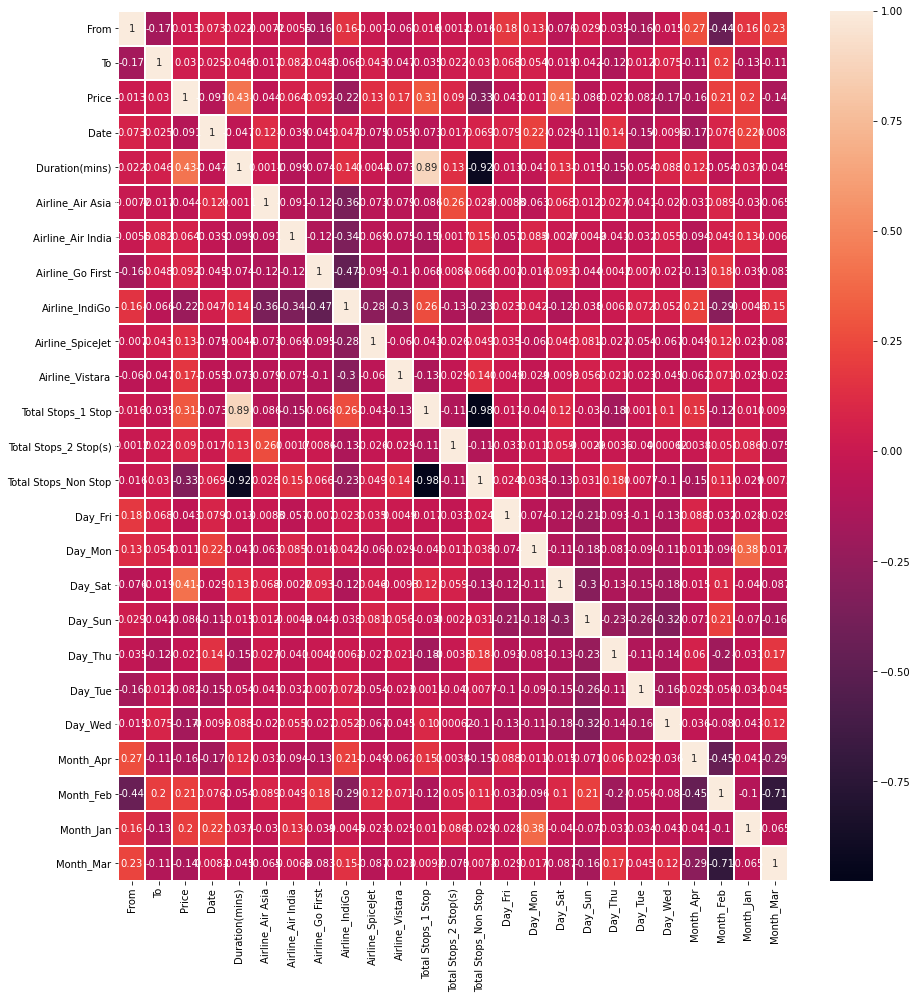

In [102]:
plt.figure(figsize=(15,16))
sns.heatmap(f_corr,annot=True,linewidth=1)
plt.show()

Visualizing correlation of feature columns with label column.

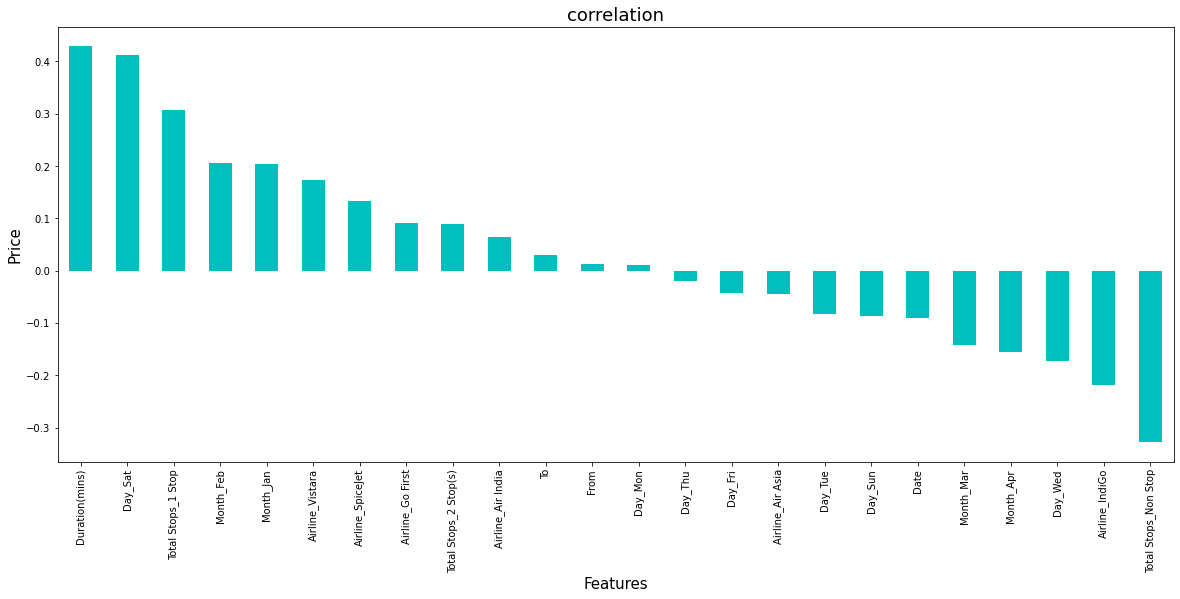

In [103]:
plt.figure(figsize = (20,8))
FP.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

It is observed that Month_Feb Duration(mins), Airline_Vistara,Total Stops_2-stop and From have the highest positive correlation with Price, while Date,Total Stops_non-stop,Month_Apr,Airline_IndiGo have the highest negative correlation with Price

# Feature Selection

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
X = FP.drop(columns = ['Price'])
y = FP['Price']

In [106]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

# Checking for Multicollinearity using Variance Inflation Factor

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
vif = pd.DataFrame()

In [109]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [110]:
vif

,Features,vif
0,From,1.470697
1,To,1.175970
2,Date,1.265416
3,Duration(mins),7.229535
4,Airline_Air Asia,inf
5,Airline_Air India,inf
6,Airline_Go First,inf
7,Airline_IndiGo,inf
8,Airline_SpiceJet,inf
9,Airline_Vistara,inf


MultiCollinearity exists amongst many columns, Based on ANOVA F scores, columns scoring the lowest will be dropped.

Selecting Kbest Features

In [111]:
from sklearn.feature_selection import SelectKBest, f_classif

In [112]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [113]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(30,'Score'))

                  Feature       Score
8        Airline_SpiceJet  373.414235
1                      To  147.653691
0                    From   63.345409
14                Day_Mon   49.061679
18                Day_Tue   28.292201
15                Day_Sat   24.497706
13                Day_Fri   24.113206
16                Day_Sun   22.909820
21              Month_Feb   19.295112
20              Month_Apr   18.847939
19                Day_Wed   16.964764
17                Day_Thu   15.189307
23              Month_Mar   14.731111
6        Airline_Go First   14.722593
3          Duration(mins)   13.529091
12   Total Stops_Non Stop   13.219143
2                    Date   13.061012
9         Airline_Vistara   12.316627
10     Total Stops_1 Stop   11.895910
22              Month_Jan   10.105275
7          Airline_IndiGo    8.113268
4        Airline_Air Asia    5.942596
5       Airline_Air India    5.610948
11  Total Stops_2 Stop(s)    2.728535


Selecting best features based on their scores:

In [114]:
x_best = X.drop(columns=['Airline_SpiceJet']).copy()

In [115]:
scaled_x_best = scaler.fit_transform(x_best)

This is a Regression Problem since Target/ Label column ('Price') has Continuous type of Data.

Regression Model Building

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
from sklearn.metrics import r2_score

Finding the Best Random State

In [119]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9387827815355264 on random_state: 15


In [120]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .25, random_state =15)

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [122]:
from sklearn.metrics import r2_score,mean_squared_error

In [123]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

Training the Models

In [124]:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

All models have been trained.

Ridge Regression Model

In [125]:
y_r_pred = r.predict(x_test)

R2 Score

In [126]:
r2_score(y_test,y_r_pred)

0.6090453699918209

Mean Squared Error

In [127]:
mean_squared_error(y_test,y_r_pred)

927168.9286364574

Root Mean Squared Error

In [128]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

962.8961151840095

Random Forest Regression Model

In [129]:
y_rf_pred = rf.predict(x_test)

R2 Score

In [130]:
r2_score(y_test,y_rf_pred)

0.9476390200235899

Mean Squared Error

In [131]:
mean_squared_error(y_test,y_rf_pred)

124176.74579290065

Root Mean Squared Error

In [132]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

352.3872100302459

XGB Regression Model

In [133]:
y_xg_pred = xg.predict(x_test)

R2 Score

In [134]:
r2_score(y_test,y_xg_pred)

0.9249168993307348

Mean Squared Error

In [135]:
mean_squared_error(y_test,y_xg_pred)

178063.41877769664

Root Mean Squared Error

In [136]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

421.9756139609215

Support Vector Regression Model

In [137]:
y_svr_pred = SV.predict(x_test)

R2 Score

In [139]:
r2_score(y_test,y_svr_pred)

-0.041245032214180855

Mean Squared Error

In [140]:
mean_squared_error(y_test,y_svr_pred)

2469365.923472651

Root Mean Squared Error

In [141]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

1571.421624985685

Decision Tree Regression Model

In [142]:
y_dt_pred = dt.predict(x_test)

R2 Score

In [143]:
r2_score(y_test,y_dt_pred)

0.862703980053766

Mean Squared Error

In [144]:
mean_squared_error(y_test,y_dt_pred)

325604.5432098765

Root Mean Squared Error

In [145]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))

570.6176856791915

Model Cross Validation

In [146]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

Ridge Regression

In [147]:
cross_val_score(r,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.4761169356597751

Random Forest Regression

In [148]:
cross_val_score(rf,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.8177905945667234

XGB Regression

In [149]:
cross_val_score(xg,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.8878091034178393

SV Regression

In [150]:
cross_val_score(SV,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

-0.03202579284422642

Decision Tree Regression

In [151]:
cross_val_score(dt,scaled_x_best,y,cv=ShuffleSplit(5)).mean()

0.9094074274982787

Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score

Hyper Parameter Tuning

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
parameter = {'n_estimators':[30,60,80],'max_depth': [40,50,80],'min_samples_leaf':[5,10,20],'min_samples_split':[2,5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=ShuffleSplit(5),n_jobs = -1,verbose = 1)

In [154]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [40, 50, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

In [155]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 60}

In [156]:
Best_mod = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 40, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 5)

Best_mod.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=40, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=60)

In [157]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

82.30600974293893


Saving The Model

In [158]:
import joblib
joblib.dump(Best_mod,"FP.pkl")

['FP.pkl']

Loading The Model

In [159]:
mod=joblib.load("FP.pkl")

In [160]:
print(mod.predict(scaled_x_best))

[2455.37374854 2451.40943057 2451.40943057 2451.40943057 2451.40943057
 2422.11062645 2423.91601409 2422.11062645 2642.67853457 2791.31908134
 3566.77964432 3521.66056862 3565.36197074 3614.04536281 3620.72499776
 3931.29599877 3818.83120911 3912.28944273 3936.98231912 3917.19302258
 2115.10781673 2116.38764808 2079.6537195  2100.8522777  2089.90686409
 2103.61675045 2109.32828244 2110.07510784 2110.07510784 2110.07510784
 3011.15979226 3025.37786562 3108.81950452 3075.2147685  3070.13144894
 3021.99837151 3013.22669702 3168.35043698 3168.35043698 3168.35043698
 2126.02090979 2117.48062558 2117.48062558 2136.20784299 2173.34693725
 2116.04126542 2112.86570446 2124.74786295 2143.12976771 2143.12976771
 2460.06811183 2435.07201305 2493.90252579 2493.90252579 2493.90252579
 2493.90252579 2472.21020327 2504.86361401 2470.22415914 2433.23961304
 9063.97436898 9063.97436898 8618.4338377  6661.29929324 9049.32976581
 8985.34859975 8605.25050436 8812.30026244 2205.13630366 2205.13630366
 2197.

In [161]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(scaled_x_best), 'Actual Values': y})
Prediction_accuracy.head(10)

,Predictions,Actual Values
0,2455.373749,2410
1,2451.409431,2410
2,2451.409431,2410
3,2451.409431,2410
4,2451.409431,2410
5,2422.110626,2410
6,2423.916014,2410
7,2422.110626,2410
8,2642.678535,2410
9,2791.319081,2410
